In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import matplotlib.pyplot as plt
import numpy as np

import kipy
from kipy.board import BoardLayer as BL
import kipy.common_types as kct
import kipy.board_types as kbt
import shapely
import shapely.geometry as sg
import shapely.plotting as sp

import breakneck.conversions
import breakneck.footprint
import breakneck.track


In [3]:
kicad = kipy.KiCad()


In [4]:
board = kicad.get_board()


In [5]:
board.get_active_layer()


3

In [6]:
footprints = board.get_footprints()
all_tracks = board.get_tracks()


In [7]:
footprints[0].definition.shapes


[BoardCircle(center=Vector2(80675000, 57600000), radius_point=Vector2(80725000, 57600000), layer=BL_Eco1_User),
 BoardCircle(center=Vector2(80675000, 57600000), radius_point=Vector2(81375000, 57600000), layer=BL_Eco1_User),
 BoardCircle(center=Vector2(80675000, 57600000), radius_point=Vector2(81625000, 57600000), layer=BL_F_Fab)]

In [9]:
track0 = all_tracks[0]
track0


Track(start=Vector2(199909024, 74641845), end=Vector2(201607494, 74641845), layer=BL_B_Cu, net=/USB3/USB3 Hub/USB3 Interface1/VBUS)

In [10]:
track0.id


value: "1c0993e1-da38-4590-bcc3-f6e2ea76d381"

In [11]:
arc_tracks = [t for t in all_tracks if isinstance(t, kbt.ArcTrack)]
arc_tracks


[ArcTrack(start=Vector2(86170960, 38741648), mid=Vector2(86100665, 38911354), end=Vector2(86170960, 39081060), layer=BL_B_Cu, net=/ETH.TD2-),
 ArcTrack(start=Vector2(86201329, 38371869), mid=Vector2(86271623, 38541575), end=Vector2(86201329, 38711280), layer=BL_B_Cu, net=/ETH.TD2-),
 ArcTrack(start=Vector2(86625592, 39135543), mid=Vector2(86795298, 39065248), end=Vector2(86965004, 39135543), layer=BL_B_Cu, net=/ETH.TD2-),
 ArcTrack(start=Vector2(86255812, 39165912), mid=Vector2(86425518, 39236207), end=Vector2(86595224, 39165912), layer=BL_B_Cu, net=/ETH.TD2-),
 ArcTrack(start=Vector2(182413937, 90853878), mid=Vector2(182547580, 90909235), end=Vector2(182681223, 90853878), layer=BL_B_Cu, net=/USB3/USB3 Hub/U32.TX+),
 ArcTrack(start=Vector2(182347116, 90519771), mid=Vector2(182291759, 90653414), end=Vector2(182347116, 90787057), layer=BL_B_Cu, net=/USB3/USB3 Hub/U32.TX+),
 ArcTrack(start=Vector2(182947511, 90587589), mid=Vector2(183081154, 90532232), end=Vector2(183214797, 90587589), la

In [12]:
at0 = arc_tracks[0]
at1 = arc_tracks[1]
at0, at1


(ArcTrack(start=Vector2(86170960, 38741648), mid=Vector2(86100665, 38911354), end=Vector2(86170960, 39081060), layer=BL_B_Cu, net=/ETH.TD2-),
 ArcTrack(start=Vector2(86201329, 38371869), mid=Vector2(86271623, 38541575), end=Vector2(86201329, 38711280), layer=BL_B_Cu, net=/ETH.TD2-))

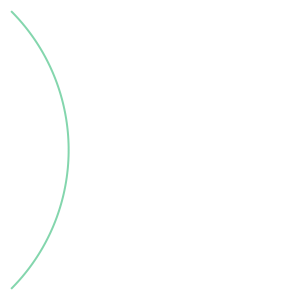

In [13]:
breakneck.conversions.arc_as_linestring(at1)


In [14]:
fp0 = footprints[0]
fp0


FootprintInstance(id=value: "011bedc4-2b75-4b45-ae0b-97fcaa1ccde1"
, pos=Vector2(104977500, 60550000), layer=BL_F_Cu)

In [15]:
f_shapes = breakneck.courtyard.get_courtyard_shapes(fp0, BL.BL_F_CrtYd)
f_shapes


AttributeError: module 'breakneck' has no attribute 'courtyard'

In [444]:
chains = breakneck.conversions._chain_shapes(f_shapes, 1000)
chains


[[BoardSegment(start=Vector2(103057500, 58850000), end=Vector2(103057500, 62250000), layer=BL_F_CrtYd),
  BoardSegment(start=Vector2(103057500, 62250000), end=Vector2(106897500, 62250000), layer=BL_F_CrtYd),
  BoardSegment(start=Vector2(106897500, 62250000), end=Vector2(106897500, 58850000), layer=BL_F_CrtYd),
  BoardSegment(start=Vector2(106897500, 58850000), end=Vector2(103057500, 58850000), layer=BL_F_CrtYd)]]

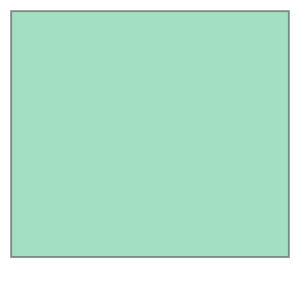

In [445]:
breakneck.conversions._chain_as_polygon(chains[0])


In [446]:
all_courtyards = breakneck.courtyard.get_all_footprints(board)


In [ ]:
unique_widths = breakneck.track.get_unique_track_widths(board.get_tracks())
unique_widths


[130000,
 140000,
 150000,
 160000,
 200000,
 300000,
 400000,
 600000,
 1000000,
 1500000,
 2000000]

In [448]:
front_tracks = [t for t in all_tracks if t.layer == BL.BL_F_Cu]
back_tracks = [t for t in all_tracks if t.layer == BL.BL_B_Cu]
front_track_tree = breakneck.track.TrackTree(front_tracks)
back_track_tree = breakneck.track.TrackTree(back_tracks)


In [449]:
c = [cyd for cyd in all_courtyards if cyd.footprint.reference_field.text.value == "R408"][0]
c


FootprintCrossings(ref='R408', footprint=FootprintInstance(id=value: "f8d939f3-7f48-42b0-8b78-550a1028a5b6"
, pos=Vector2(61300000, 92900000), layer=BL_F_Cu), front_courtyards=[<POLYGON ((60570000 -91420000, 62030000 -91420000, 62030000 -94380000, 60570...>], back_courtyards=[])

In [450]:
hits = front_track_tree.bounding_box_hit(c.front_courtyards, 2000000)
hits


[(Track(start=Vector2(58599000, 97603052), end=Vector2(58599000, 96302200), layer=BL_F_Cu, net=/Power/Buck converter 10V/Buck 10V IC/ILIM),
  <LINESTRING (58599000 -97603052, 58599000 -96302200)>),
 (Track(start=Vector2(58599000, 96302200), end=Vector2(57457500, 95160700), layer=BL_F_Cu, net=/Power/Buck converter 10V/Buck 10V IC/ILIM),
  <LINESTRING (58599000 -96302200, 57457500 -95160700)>),
 (Track(start=Vector2(56500000, 93279136), end=Vector2(58814136, 90965000), layer=BL_F_Cu, net=/Iin),
  <LINESTRING (56500000 -93279136, 58814136 -90965000)>),
 (Track(start=Vector2(62033500, 96439000), end=Vector2(62033500, 94458500), layer=BL_F_Cu, net=/Power/Buck converter 10V/FB),
  <LINESTRING (62033500 -96439000, 62033500 -94458500)>),
 (Track(start=Vector2(62033500, 94458500), end=Vector2(61300000, 93725000), layer=BL_F_Cu, net=/Power/Buck converter 10V/FB),
  <LINESTRING (62033500 -94458500, 61300000 -93725000)>),
 (Track(start=Vector2(61300000, 93725000), end=Vector2(59357500, 93725000), 

In [451]:
tracks, linestrings = zip(*hits)


In [452]:
crossings = c.find_crossings(tracks, linestrings, True)
crossings


defaultdict(list,
            {Track(start=Vector2(62033500, 96439000), end=Vector2(62033500, 94458500), layer=BL_F_Cu, net=/Power/Buck converter 10V/FB): [Coords(62033500, -94589969)],
             Track(start=Vector2(61300000, 93725000), end=Vector2(59357500, 93725000), layer=BL_F_Cu, net=/Power/Buck converter 10V/FB): [Coords(60360000, -93725000)]})

In [453]:
t, pts = list(crossings.items())[0]


In [454]:
t


Track(start=Vector2(62033500, 96439000), end=Vector2(62033500, 94458500), layer=BL_F_Cu, net=/Power/Buck converter 10V/FB)

In [455]:
pts


[Coords(62033500, -94589969)]

In [456]:
new_tracks = breakneck.track.break_track(t, pts)
new_tracks


[Track(start=Vector2(62033500, 96439000), end=Vector2(62033500, 94589969), layer=BL_F_Cu, net=/Power/Buck converter 10V/FB),
 Track(start=Vector2(62033500, 94589969), end=Vector2(62033500, 94458500), layer=BL_F_Cu, net=/Power/Buck converter 10V/FB)]

In [457]:
centers = [breakneck.conversions.vector2_as_coords(t.center()) for t in new_tracks]
centers


AttributeError: 'Track' object has no attribute 'center'

In [375]:
# plot track t
arc_linestring = breakneck.conversions.arc_as_linestring(t)
plt.plot(*arc_linestring.xy, color="blue")

# plot courtyard c
#plt.plot(*c.front_courtyards[0].exterior.xy, color="red")

# plot crossing points
for pt in pts:
    plt.plot(pt.x, pt.y, "o", color="green")

# plot first new track
nt = new_tracks[2]
nt_ls = breakneck.conversions.track_as_linestring(nt)
plt.plot(*nt_ls.xy, color="purple")


AttributeError: 'Track' object has no attribute 'mid'

In [376]:
# plot track t
arc_linestring = breakneck.conversions.arc_as_linestring(t)
plt.plot(*arc_linestring.xy, color="blue")
# plot midpoint
midpt = breakneck.conversions.vector2_as_coords(t.mid)
plt.plot(*midpt, marker="o", color="blue")

colors = ["red", "green", "purple", "orange", "black", "pink", "brown", "gray", "cyan", "magenta"]

for i, track in enumerate(new_tracks):
    arc_linestring = breakneck.conversions.arc_as_linestring(track)
    plt.plot(*arc_linestring.xy, color=colors[i % len(colors)])


AttributeError: 'Track' object has no attribute 'mid'

In [528]:
all_tracks = {t.id.value: t for t in board.get_tracks()}
commit = board.begin_commit()
old_list = []
new_list = []


In [529]:
fpc = [cyd for cyd in all_courtyards if cyd.footprint.reference_field.text.value == "R408"][0]
old, new = fpc.break_tracks(list(all_tracks.values()), 2000000)
print(f"old: {[o.id.value for o in old]}")
print(f"new: {[n.id.value for n in new]}")

# remove old from all_tracks and new_list
for t in old:
    all_tracks.pop(t.id.value)
    try:
        new_list.remove(t)
    except ValueError:
        pass

for t in new:
    all_tracks[t.id.value] = t

old_list.extend(old)
new_list.extend(new)


Breaking front tracks
Finding bounding box hits
Finding crossings
old: ['b3e6c557-dbe7-4c7a-9b39-ec890d2a7d05', '6787c366-0a91-4c5b-8f58-17646a8bd3b3', '86930dd7-6bbc-4660-a590-7c934fbe2943']
new: ['f484aa56-c5db-4f17-8185-b52990848568', 'd72bccb5-7251-41b0-a091-f00ec7a06912', 'bcf45da9-3ad6-4f8e-aef5-3a7304d9a4e6']


In [530]:
fpc = [cyd for cyd in all_courtyards if cyd.footprint.reference_field.text.value == "R409"][0]
old, new = fpc.break_tracks(list(all_tracks.values()), 2000000)
print(f"old: {[o.id.value for o in old]}")
print(f"new: {[n.id.value for n in new]}")

# remove old from all_tracks and new_list
for t in old:
    all_tracks.pop(t.id.value)
    try:
        new_list.remove(t)
    except ValueError:
        pass

for t in new:
    all_tracks[t.id.value] = t

old_list.extend(old)
new_list.extend(new)


Breaking front tracks
Finding bounding box hits
Finding crossings
old: ['d72bccb5-7251-41b0-a091-f00ec7a06912', 'd32f2241-1c2f-4a4e-bc4c-472b78555c60', '39d8332e-a3f9-44c1-ae70-a3406029a4d7']
new: ['374f1033-edd7-4ec2-ad42-796fe9128ea1', '7c4eb0cf-d084-4b31-a4c0-c2c3d1689d20', '406a7dc9-ceb7-4b55-818a-b77e19ed9e7d']


In [531]:
board.remove_items(old_list)
board.create_items(new_list)
board.push_commit(commit)


In [501]:
board.drop_commit(commit)


In [86]:
# Select a footprint
sel = board.get_selection()
sel = sel[0]
sel


FootprintInstance(id=value: "59b6201d-1c0c-4f6a-8134-8c1a82b36bd6"
, pos=Vector2(157500000, 69300000), layer=BL_F_Cu)

In [59]:
# Select a track
trk = board.get_selection()
trk = trk[0]
trk


Track(start=Vector2(158525958, 69928750), end=Vector2(119276832, 69928750), layer=BL_F_Cu, net=/USB.D+)

In [87]:
trk_shape = breakneck.conversions.track_as_linestring(trk)


In [88]:
max_width = 2000000


In [89]:
shapes = breakneck.footprint.get_courtyard_shapes(sel, BL.BL_F_CrtYd)
shapes


[BoardRectangle(top_left=Vector2(159450000, 65050000), bottom_right=Vector2(155075000, 73550000), layer=BL_F_CrtYd]

In [90]:
breakneck.conversions.as_polygons(shapes, 1000)


[<POLYGON ((159450000 -65050000, 155075000 -65050000, 155075000 -73550000, 15...>]

In [91]:
bn_footprint = breakneck.footprint.get_bn_footprints([sel])[0]
bn_footprint


BNFootprint(ref='U1602', footprint=FootprintInstance(id=value: "59b6201d-1c0c-4f6a-8134-8c1a82b36bd6"
, pos=Vector2(157500000, 69300000), layer=BL_F_Cu), front_courtyards=[<POLYGON ((159450000 -65050000, 155075000 -65050000, 155075000 -73550000, 15...>], back_courtyards=[])

In [92]:
#front_tracks = [t for t in all_tracks if t.layer == BL.BL_F_Cu]
front_tracks = [trk]
front_track_tree = breakneck.track.TrackTree(front_tracks)


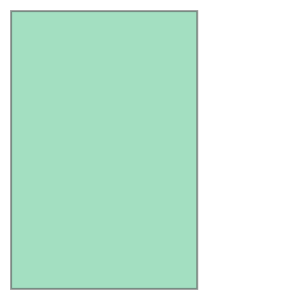

In [93]:
bounding_box = (
            shapely.union_all(bn_footprint.front_courtyards).envelope.buffer(max_width).envelope
        )
bounding_box


(<matplotlib.patches.PathPatch at 0x120481450>,
 <matplotlib.lines.Line2D at 0x120481590>)

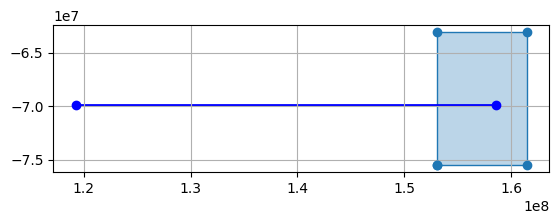

In [94]:

sp.plot_polygon(bounding_box)
sp.plot_line(trk_shape, color="blue")


In [95]:
bounding_box.intersects(trk_shape)


True

In [55]:
front_hits = front_track_tree._track_tree.query(bounding_box.exterior, predicate="intersects")
front_hits


array([], dtype=int64)

TypeError: object of type 'TrackTree' has no len()

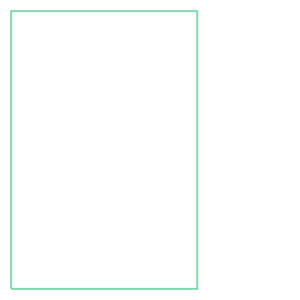

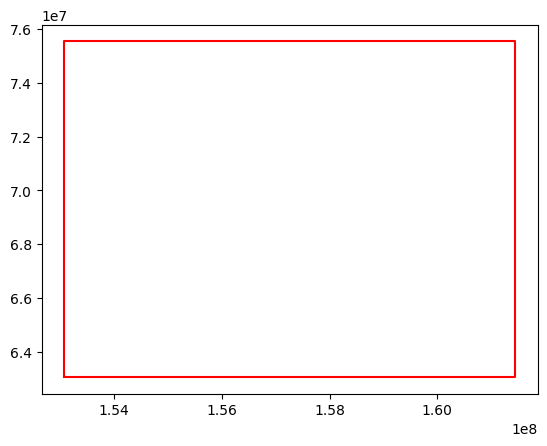

In [46]:
plt.plot(*bounding_box.exterior.xy, color="red")


In [38]:
bn_footprint.front_courtyards


[<POLYGON ((159450000 65050000, 155075000 65050000, 155075000 73550000, 15945...>]

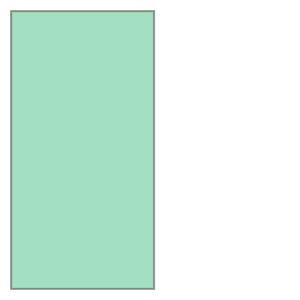

In [25]:
bn_footprint.front_courtyards[0]
